In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("../Data Source/combined.csv")

# Handle missing values
data.dropna(inplace=True)

# Split data into features and target variable
X = data.drop(columns=["Total Primary Energy Consumption"])
y = data["Total Primary Energy Consumption"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
# Import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [4]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.0005254894921072728
R-squared Score: 0.9999990400982678


In [5]:
# Example of hyperparameter tuning for RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model - Mean Squared Error:", mse)
print("Best Model - R-squared Score:", r2)


Best Model - Mean Squared Error: 2.515044083194235
Best Model - R-squared Score: 0.9954058164655514


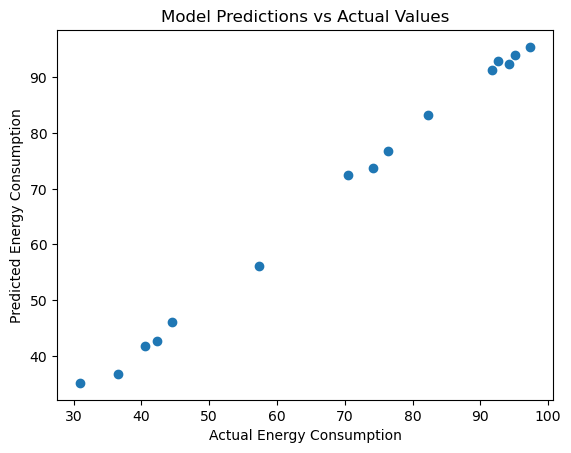

In [11]:
# Example: Visualize model predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Model Predictions vs Actual Values")
plt.savefig('../Visualization_images/Model_Predictions_vs_Actual_Values.png')
plt.show()


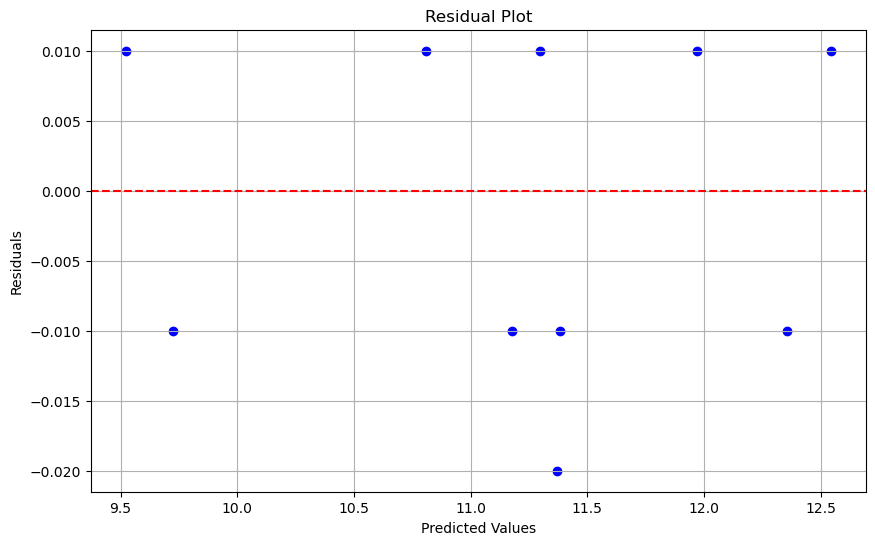

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Actual and predicted values
actual_values = np.array([11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287])
predicted_values = np.array([11.970905, 12.357109, 12.542996, 11.296479, 11.382684, 9.724667, 11.177259, 11.369723, 10.810631, 9.523287])

# Calculate residuals
residuals = actual_values - predicted_values

# Plot the residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.savefig('../Visualization_images/Residual_plot.png')
plt.show()


In [ ]:
#above explanation-This plot will help you identify any patterns or trends in the residuals. Ideally, the residuals should be randomly scattered around the horizontal line at y=0, indicating that the model's predictions are unbiased. If you observe any patterns or trends, it suggests that the model may have systematic errors that need to be addressed.


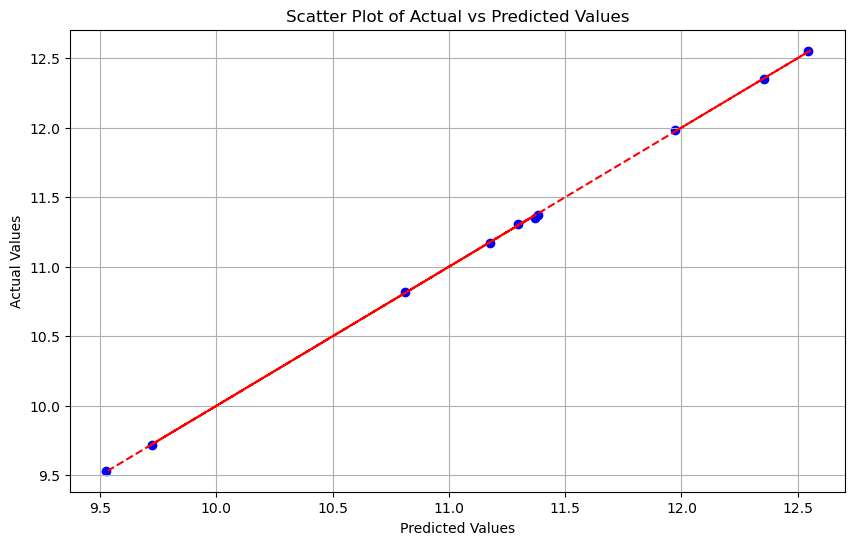

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Actual and predicted values
actual_values = np.array([11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287])
predicted_values = np.array([11.970905, 12.357109, 12.542996, 11.296479, 11.382684, 9.724667, 11.177259, 11.369723, 10.810631, 9.523287])

# Plot actual values against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, actual_values, color='blue')
plt.plot(actual_values, actual_values, color='red', linestyle='--')  # Plot the line y=x for reference
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.grid(True)
plt.savefig('../Visualization_images/Actual_vs_predicted_values.png')
plt.show()


In [ ]:
#explanation for above -Plot the line y=x for reference using plt.plot() to visualize where the actual values and predicted values would align perfectly.

Set the title, x-label, and y-label for the plot using plt.title(), plt.xlabel(), and plt.ylabel() functions, respectively.

Display the plot using plt.show().

This plot will visually show how well the model predictions align with the actual data points. If the points fall close to the diagonal line (y=x), it indicates that the model predictions closely match the actual values.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Year': [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Coal Consumption': [11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287, 9.518353, 9.837785, 9.623351, 9.906454, 10.412538, 10.964385, 11.580608, 12.14308, 11.91375, 12.330677, 12.38154, 12.264528, 11.598411, 12.076917, 12.97149, 12.662878, 12.662786, 13.584067, 13.922103, 13.765575, 15.039586, 15.422809, 15.907526, 15.321581, 15.894442, 17.070622, 17.478428, 17.260405, 18.008451, 18.846312, 19.069762, 19.172635, 18.99167, 19.122471, 19.835148, 19.909463, 20.088727, 21.001914, 21.445411, 21.655744, 21.622544, 22.579528, 21.914268, 21.903989, 22.320928, 22.466195, 22.796543, 22.44716, 22.749466, 22.387437, 19.691205, 20.833968, 19.657784, 17.378234, 18.038633, 17.997632, 15.54887, 14.225905, 13.837465, 13.251532, 11.315595, 9.181109, 10.548526, 9.887939, 8.18045],
    'Natural Gas Consumption': [5.145142, 5.968371, 7.048518, 7.549621, 7.906645, 8.330202, 8.997935, 9.613975, 10.190753, 10.663199, 11.717422, 12.385366, 12.926392, 13.730841, 14.403306, 15.28785, 15.768667, 16.995332, 17.944788, 19.209656, 20.677984, 21.794707, 22.469052, 22.69819, 22.512399, 21.732488, 19.947883, 20.345426, 19.930513, 20.0004, 20.665817, 20.235459, 19.74731, 18.356222, 17.220836, 18.393613, 17.703482, 16.591364, 17.639801, 18.448393, 19.601606, 19.603267, 20.032958, 20.713632, 21.229, 21.728067, 22.671139, 23.084647, 23.222716, 22.830226, 22.909227, 23.823977, 22.772558, 23.510081, 22.830642, 22.923061, 22.565364, 22.238738, 23.662759, 23.842953, 23.41594, 24.574754, 24.954539, 26.088582, 26.805134, 27.382833, 28.191095, 28.400352, 28.055093, 31.162834, 32.263692, 31.640017, 31.711113, 33.347492, 33.608138],
    'Petroleum Consumption': [11.868994, 13.298283, 14.407674, 14.933895, 15.531959, 15.813334, 17.225269, 17.904978, 17.89839, 18.49119, 19.279894, 19.873507, 20.169333, 20.997591, 21.645265, 22.241894, 23.1839, 24.335358, 25.273959, 26.966419, 28.320574, 29.499198, 30.538718, 32.918906, 34.806025, 33.420613, 32.683785, 31.55452, 29.491758, 28.424773, 28.244533, 28.273319, 27.411677, 27.604914, 27.667504, 27.261527, 27.149248, 27.168781, 27.275245, 27.28188, 27.458897, 27.57165, 27.477518, 26.618489, 25.692265, 24.755723, 24.434242, 24.409494, 24.317252, 23.507065, 23.137972, 23.249888, 23.399334, 23.475032, 22.710406, 22.754524, 22.865073, 22.383012, 21.589234, 20.775378, 20.044103, 20.148735, 20.299373, 20.40521, 19.564774, 18.992187, 18.679019, 18.091924, 17.329387, 16.376513, 15.76864, 15.677757, 15.480164, 15.601254, 15.381634, 14.568515, 13.831983, 13.828038, 13.522745]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Year' column to datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set 'Year' column as index
df.set_index('Year', inplace=True)

# Check if all columns have the same length
if len(df['Coal Consumption']) == len(df['Natural Gas Consumption']) == len(df['Petroleum Consumption']):
    # Plot the time series data
    plt.figure(figsize=(14, 8))

    # Plot Coal Consumption
    plt.plot(df.index, df['Coal Consumption'], color='blue', label='Coal Consumption')

    # Plot Natural Gas Consumption
    plt.plot(df.index, df['Natural Gas Consumption'], color='green', label='Natural Gas Consumption')

    # Plot Petroleum Consumption
    plt.plot(df.index, df['Petroleum Consumption'], color='red', label='Petroleum Consumption')

    plt.title('Energy Consumption Over Time')
    plt.xlabel('Year')
    plt.ylabel('Consumption (Million Tonnes of Oil Equivalent)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Length of arrays for each energy consumption variable is not the same.")


ValueError: All arrays must be of the same length

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Year': [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Coal Consumption': [11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287, 9.518353, 9.837785, 9.623351, 9.906454, 10.412538, 10.964385, 11.580608, 12.14308, 11.91375, 12.330677, 12.38154, 12.264528, 11.598411, 12.076917, 12.97149, 12.662878, 12.662786, 13.584067, 13.922103, 13.765575, 15.039586, 15.422809, 15.907526, 15.321581, 15.894442, 17.070622, 17.478428, 17.260405, 18.008451, 18.846312, 19.069762, 19.172635, 18.99167, 19.122471, 19.835148, 19.909463, 20.088727, 21.001914, 21.445411, 21.655744, 21.622544, 22.579528, 21.914268, 21.903989, 22.320928, 22.466195, 22.796543, 22.44716, 22.749466, 22.387437, 19.691205, 20.833968, 19.657784, 17.378234, 18.038633, 17.997632, 15.54887, 14.225905, 13.837465, 13.251532, 11.315595, 9.181109, 10.548526, 9.887939, 8.18045],
    'Natural Gas Consumption': [5.145142, 5.968371, 7.048518, 7.549621, 7.906645, 8.330202, 8.997935, 9.613975, 10.190753, 10.663199, 11.717422, 12.385366, 12.926392, 13.730841, 14.403306, 15.28785, 15.768667, 16.995332, 17.944788, 19.209656, 20.677984, 21.794707, 22.469052, 22.69819, 22.512399, 21.732488, 19.947883, 20.345426, 19.930513, 20.0004, 20.665817, 20.235459, 19.74731, 18.356222, 17.220836, 18.393613, 17.703482, 16.591364, 17.639801, 18.448393, 19.601606, 19.603267, 20.032958, 20.713632, 21.229, 21.728067, 22.671139, 23.084647, 23.222716, 22.830226, 22.909227, 23.823977, 22.772558, 23.510081, 22.830642, 22.923061, 22.565364, 22.238738, 23.662759, 23.842953, 23.41594, 24.574754, 24.954539, 26.088582, 26.805134, 27.382833, 28.191095, 28.400352, 28.055093, 31.162834, 32.263692, 31.640017, 31.711113, 33.347492, 33.608138],
    'Petroleum Consumption': [11.868994, 13.298283, 14.407674, 14.933895, 15.531959, 15.813334, 17.225269, 17.904978, 17.89839, 18.49119, 19.279894, 19.873507, 20.169333, 20.997591, 21.645265, 22.241894, 23.1839, 24.335358, 25.273959, 26.966419, 28.320574, 29.499198, 30.538718, 32.918906, 34.806025, 33.420613, 32.683785, 31.55452, 29.491758, 28.424773, 28.244533, 28.273319, 27.411677, 27.604914, 27.667504, 27.261527, 27.149248, 27.168781, 27.275245, 27.28188, 27.458897, 27.57165, 27.477518, 26.618489, 25.692265, 24.755723, 24.434242, 24.409494, 24.317252, 23.507065, 23.137972, 23.249888, 23.399334, 23.475032, 22.710406, 22.754524, 22.865073, 22.383012, 21.589234, 20.775378, 20.044103, 20.148735, 20.299373, 20.40521, 19.564774, 18.992187, 18.679019, 18.091924, 17.329387, 16.376513, 15.76864, 15.677757, 15.480164, 15.601254, 15.381634, 14.568515, 13.831983, 13.828038, 13.522745]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Year' column to datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set 'Year' column as index
df.set_index('Year', inplace=True)

# Check if all columns have the same length
if len(df['Coal Consumption']) == len(df['Natural Gas Consumption']) == len(df['Petroleum Consumption']):
    # Plot the time series data
    plt.figure(figsize=(14, 8))

    # Plot Coal Consumption
    plt.plot(df.index, df['Coal Consumption'], color='blue', label='Coal Consumption')

    # Plot Natural Gas Consumption
    plt.plot(df.index, df['Natural Gas Consumption'], color='green', label='Natural Gas Consumption')

    # Plot Petroleum Consumption
    plt.plot(df.index, df['Petroleum Consumption'], color='red', label='Petroleum Consumption')

    plt.title('Energy Consumption Over Time')
    plt.xlabel('Year')
    plt.ylabel('Consumption (Million Tonnes of Oil Equivalent)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Length of arrays for each energy consumption variable is not the same.")


ValueError: All arrays must be of the same length